In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars,reset
from lowEBMs.Packages.Functions import plotmeanstd
from lowEBMs import update_plotstyle
import matplotlib
update_plotstyle()
matplotlib.rcParams['lines.linewidth']=1.1
time_sec_year=60*60*24*365
def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

In [17]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
variable_importer(configCTRLVolc1D,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

configVolc_EVA=importer('Dev_Data/Volcanic_EVA_Optimization.ini')
variable_importer(configVolc_EVA,False)#,accuracy_number=2000,accuracy=1e-4)
configVolc_EVA,ParasVolc_EVA=add_sellersparameters(configVolc_EVA,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
#Elevation_weight=np.average(0.0065*np.array(ParasCTRL[1][1]),weights=np.cos(Vars.Lat*2*np.pi/360))
Vars.T,Vars.T_global=CTRLVolc1D_ZMT,CTRLVolc1D_GMT
Volc_EVA=rk4alg(model_equation,configVolc_EVA['eqparam'],configVolc_EVA['funccomp'])

Loading Configuration from: Dev_Data/Volcanic_CTRL.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...



Simulation finished within 36.62766695022583 seconds
Loading Configuration from: Dev_Data/Volcanic_EVA_Optimization.ini
0D
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini


ZeroDivisionError: float division by zero

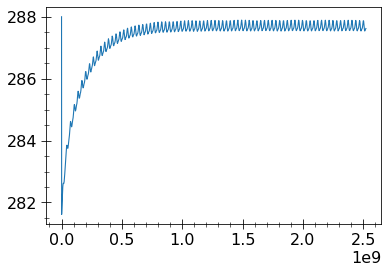

In [64]:
plt.plot(CTRLVolc1D[0],CTRLVolc1D[2])

[array([-7.25558894e+07, -1.52300184e+08, -2.11575669e+08, -2.33935326e+08,
       -2.29278911e+08, -1.96110013e+08, -1.40236035e+08, -7.33178019e+07,
       -4.86637999e+06,  5.94093007e+07,  1.18719010e+08,  1.65884483e+08,
        1.91299100e+08,  1.90085339e+08,  1.67448591e+08,  1.26155921e+08,
        6.43135463e+07])
 array([-7.35569530e+07, -1.56178372e+08, -2.16225004e+08, -2.34383647e+08,
       -2.24575772e+08, -1.82161458e+08, -1.00785945e+08, -1.49844148e+06,
        8.49339323e+07,  1.43010167e+08,  1.65370080e+08,  1.80323372e+08,
        1.94629192e+08,  1.91196901e+08,  1.66036537e+08,  1.20976333e+08,
        6.26361244e+07])
 array([-7.45681081e+07, -1.59614546e+08, -2.19881671e+08, -2.34240734e+08,
       -2.17782374e+08, -1.64175621e+08, -6.77902696e+07,  3.71768973e+07,
        1.22857295e+08,  1.77653022e+08,  1.96951641e+08,  1.98192945e+08,
        1.99983900e+08,  1.92468380e+08,  1.64894952e+08,  1.17118736e+08,
        6.07336952e+07])
 ...
 array([-6.596431

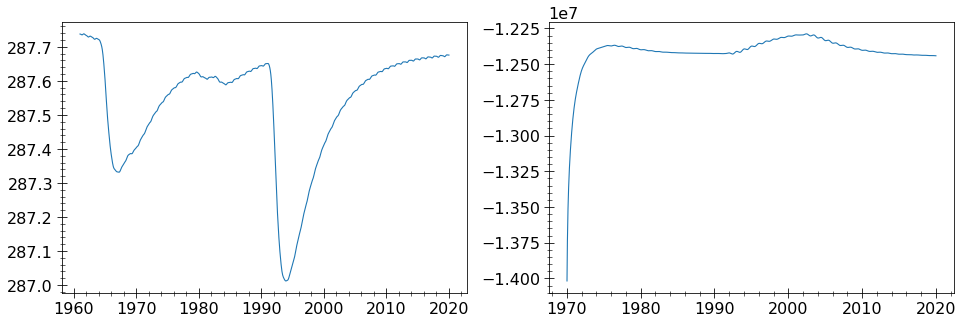

In [92]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
C=np.zeros(len(Vars.Read['P']))
print(Vars.Read['P'])
for i in range(len(Vars.Read['P'])):
    C[i]=np.average(Vars.Read['P'][i],weights=np.cos(Vars.Lat2*np.pi/180))
#plt.ylim(-0.9,0.2)
#ax[0].xlim(1980,2010)
#plt.plot(Volc_EVA[0]/time_sec_year,Volc_EVA[2])#-CTRLVolc1D_GMT)
ax[0].plot(Volc_EVA[0]/time_sec_year,moving_average(Volc_EVA[2],36))#-CTRLVolc1D_GMT,36))
#C=print(np.shape(np.array(Vars.Read['C'])))
ax[1].plot(Volc_EVA[0][1:]/time_sec_year,moving_average(C,365))

In [2]:
from lowEBMs.Packages.Configuration import import_parallelparameter, allocate_parallelparameter, write_parallelparameter
from lowEBMs.Packages.Variables import variable_importer_parallelized, builtin_importer_parallelized
import xarray as xr

In [3]:
configCTRLVolc1D=importer('Dev_Data/Volcanic_CTRL.ini')
raw=import_parallelparameter('Dev_Data/EnsembleConfig.ini')
allocated,setup=allocate_parallelparameter(raw)
#variable_importer(configCTRLVolc1D,False)
variable_importer_parallelized(configCTRLVolc1D,setup,False)#,accuracy_number=2000,accuracy=1e-4)
configCTRLVolc1D,ParasCTRL=add_sellersparameters(configCTRLVolc1D,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
configCTRLVolc1D=write_parallelparameter(configCTRLVolc1D,allocated,setup)
#print(configCTRLVolc1D)
#print(np.shape(Vars.T))
#print(configCTRLVolc1D['funccomp']['funcparam']['func2'])
CTRLVolc1D=rk4alg(model_equation,configCTRLVolc1D['eqparam'],configCTRLVolc1D['funccomp'])
CTRLVolc1D_ZMT=np.mean(CTRLVolc1D[1][-36*10:],axis=0)
CTRLVolc1D_GMT=np.mean(CTRLVolc1D[2][-36*10:],axis=0)

Loading Configuration from: Dev_Data/Volcanic_CTRL.ini
Loading fit-configuration from: Dev_Data/EnsembleConfig.ini
Loading Parameters from: /Home/siv32/bsc029/.local/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...


KeyboardInterrupt: 

{'func2': {'factor_oc': array([1.15, 1.18]), 'factor_kwv': array([1.15, 1.18]), 'factor_kair': array([1.15, 1.18])}}


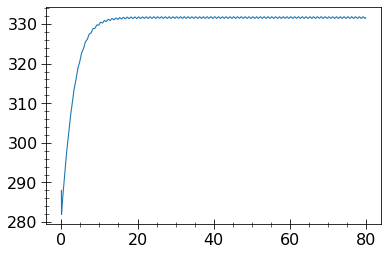

In [4]:
plt.plot(CTRLVolc1D[0]/time_sec_year,CTRLVolc1D[2][:,0])
print(allocated)

In [8]:
import time
num=3
dim=3
a=[1,2,3]
b=[1,4,5]
c=[1,0,2]
data=[a,b,c]



def iterate(x,index):
    dataout=np.reshape(np.zeros(dim**num),(dim,dim,dim))
    i,j,k=0,0,0
    while k<dim:
        while j<dim:
            while i<dim:
                if index=='i':
                    ind=i
                elif index=='j':
                    ind=j
                elif index=='k':
                    ind=k
                dataout[i,j,k]=x[ind]
                #print(i,j,k)
                i += 1
                if i==dim:
                    j+=1
                    i=0
                if j==dim:
                    k+=1
                    j=0
                if k==dim:
                    i,j=dim,dim
    return dataout
           
dat=[iterate(a,'i'),iterate(b,'j'),iterate(c,'k')]
o=0
n=0
m=0
print(dat)

[array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]]), array([[[1., 1., 1.],
        [4., 4., 4.],
        [5., 5., 5.]],

       [[1., 1., 1.],
        [4., 4., 4.],
        [5., 5., 5.]],

       [[1., 1., 1.],
        [4., 4., 4.],
        [5., 5., 5.]]]), array([[[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]],

       [[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]],

       [[1., 0., 2.],
        [1., 0., 2.],
        [1., 0., 2.]]])]
